<img src="https://www.insidehighered.com/sites/default/server_files/media/california_0.jpg" width=400>  


The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory

Acknowledgements:
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

In [1]:
import pandas as pd
CA_url="https://raw.githubusercontent.com/csbfx/advpy122-data/master/California_housing.csv"

ca = pd.read_csv(CA_url)
ca.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Q1: show the number of missing data in each column of the dataframe

In [2]:
# Your code here . . .
missing_data = ca.isnull().sum()
print(missing_data)



longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


### Q2: show the data type for each column of the dataframe

In [3]:
# Your code here . . .
#I need to know what type of data is in each column because I want to understand how to handle it
data_types = ca.dtypes
#google automation but anyways we can use .dtypes attributes to get the data type of each column
print(data_types)


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


### Q3: Plot a regression line and confidence interval
Create a lmplot that shows the linear regression between `median_income` and `median_house_value`. Only use data with `median_housing_value` < 500000. Include a meaningful title for the plot.

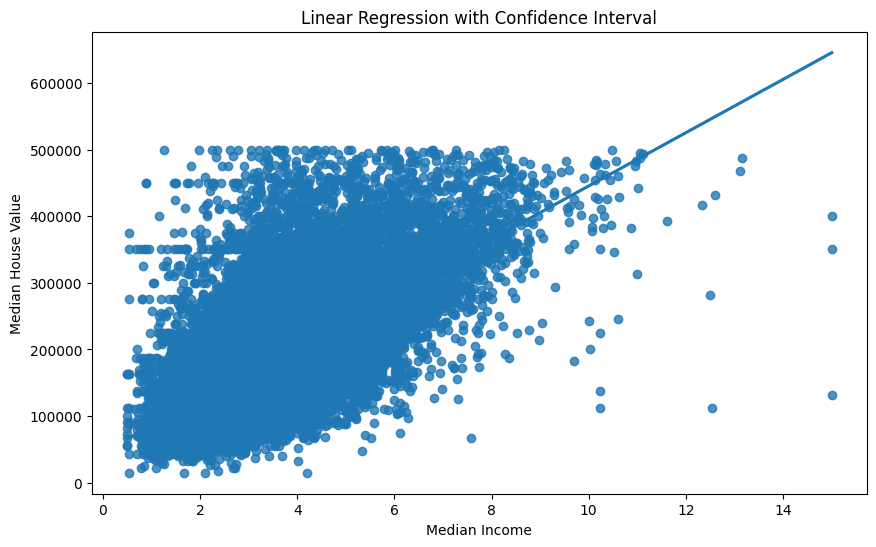

In [12]:
# Your code here . . .
import matplotlib.pyplot as plt
import seaborn as sns

#So we have to remember that the only data we can use is the median value < 500,000

#lets filter out the data <= 500,000

filtering_data = ca[ca['median_house_value'] <= 500000]

plt.figure(figsize=(10, 6))

#Im setting ci=none because it stands for confidence interval and its telling seaborn not to draw a confidence int around the
#regression line
sns.regplot(x='median_income', y='median_house_value', data=filtering_data, ci=None)


plt.title('Linear Regression with Confidence Interval')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

### Q4: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

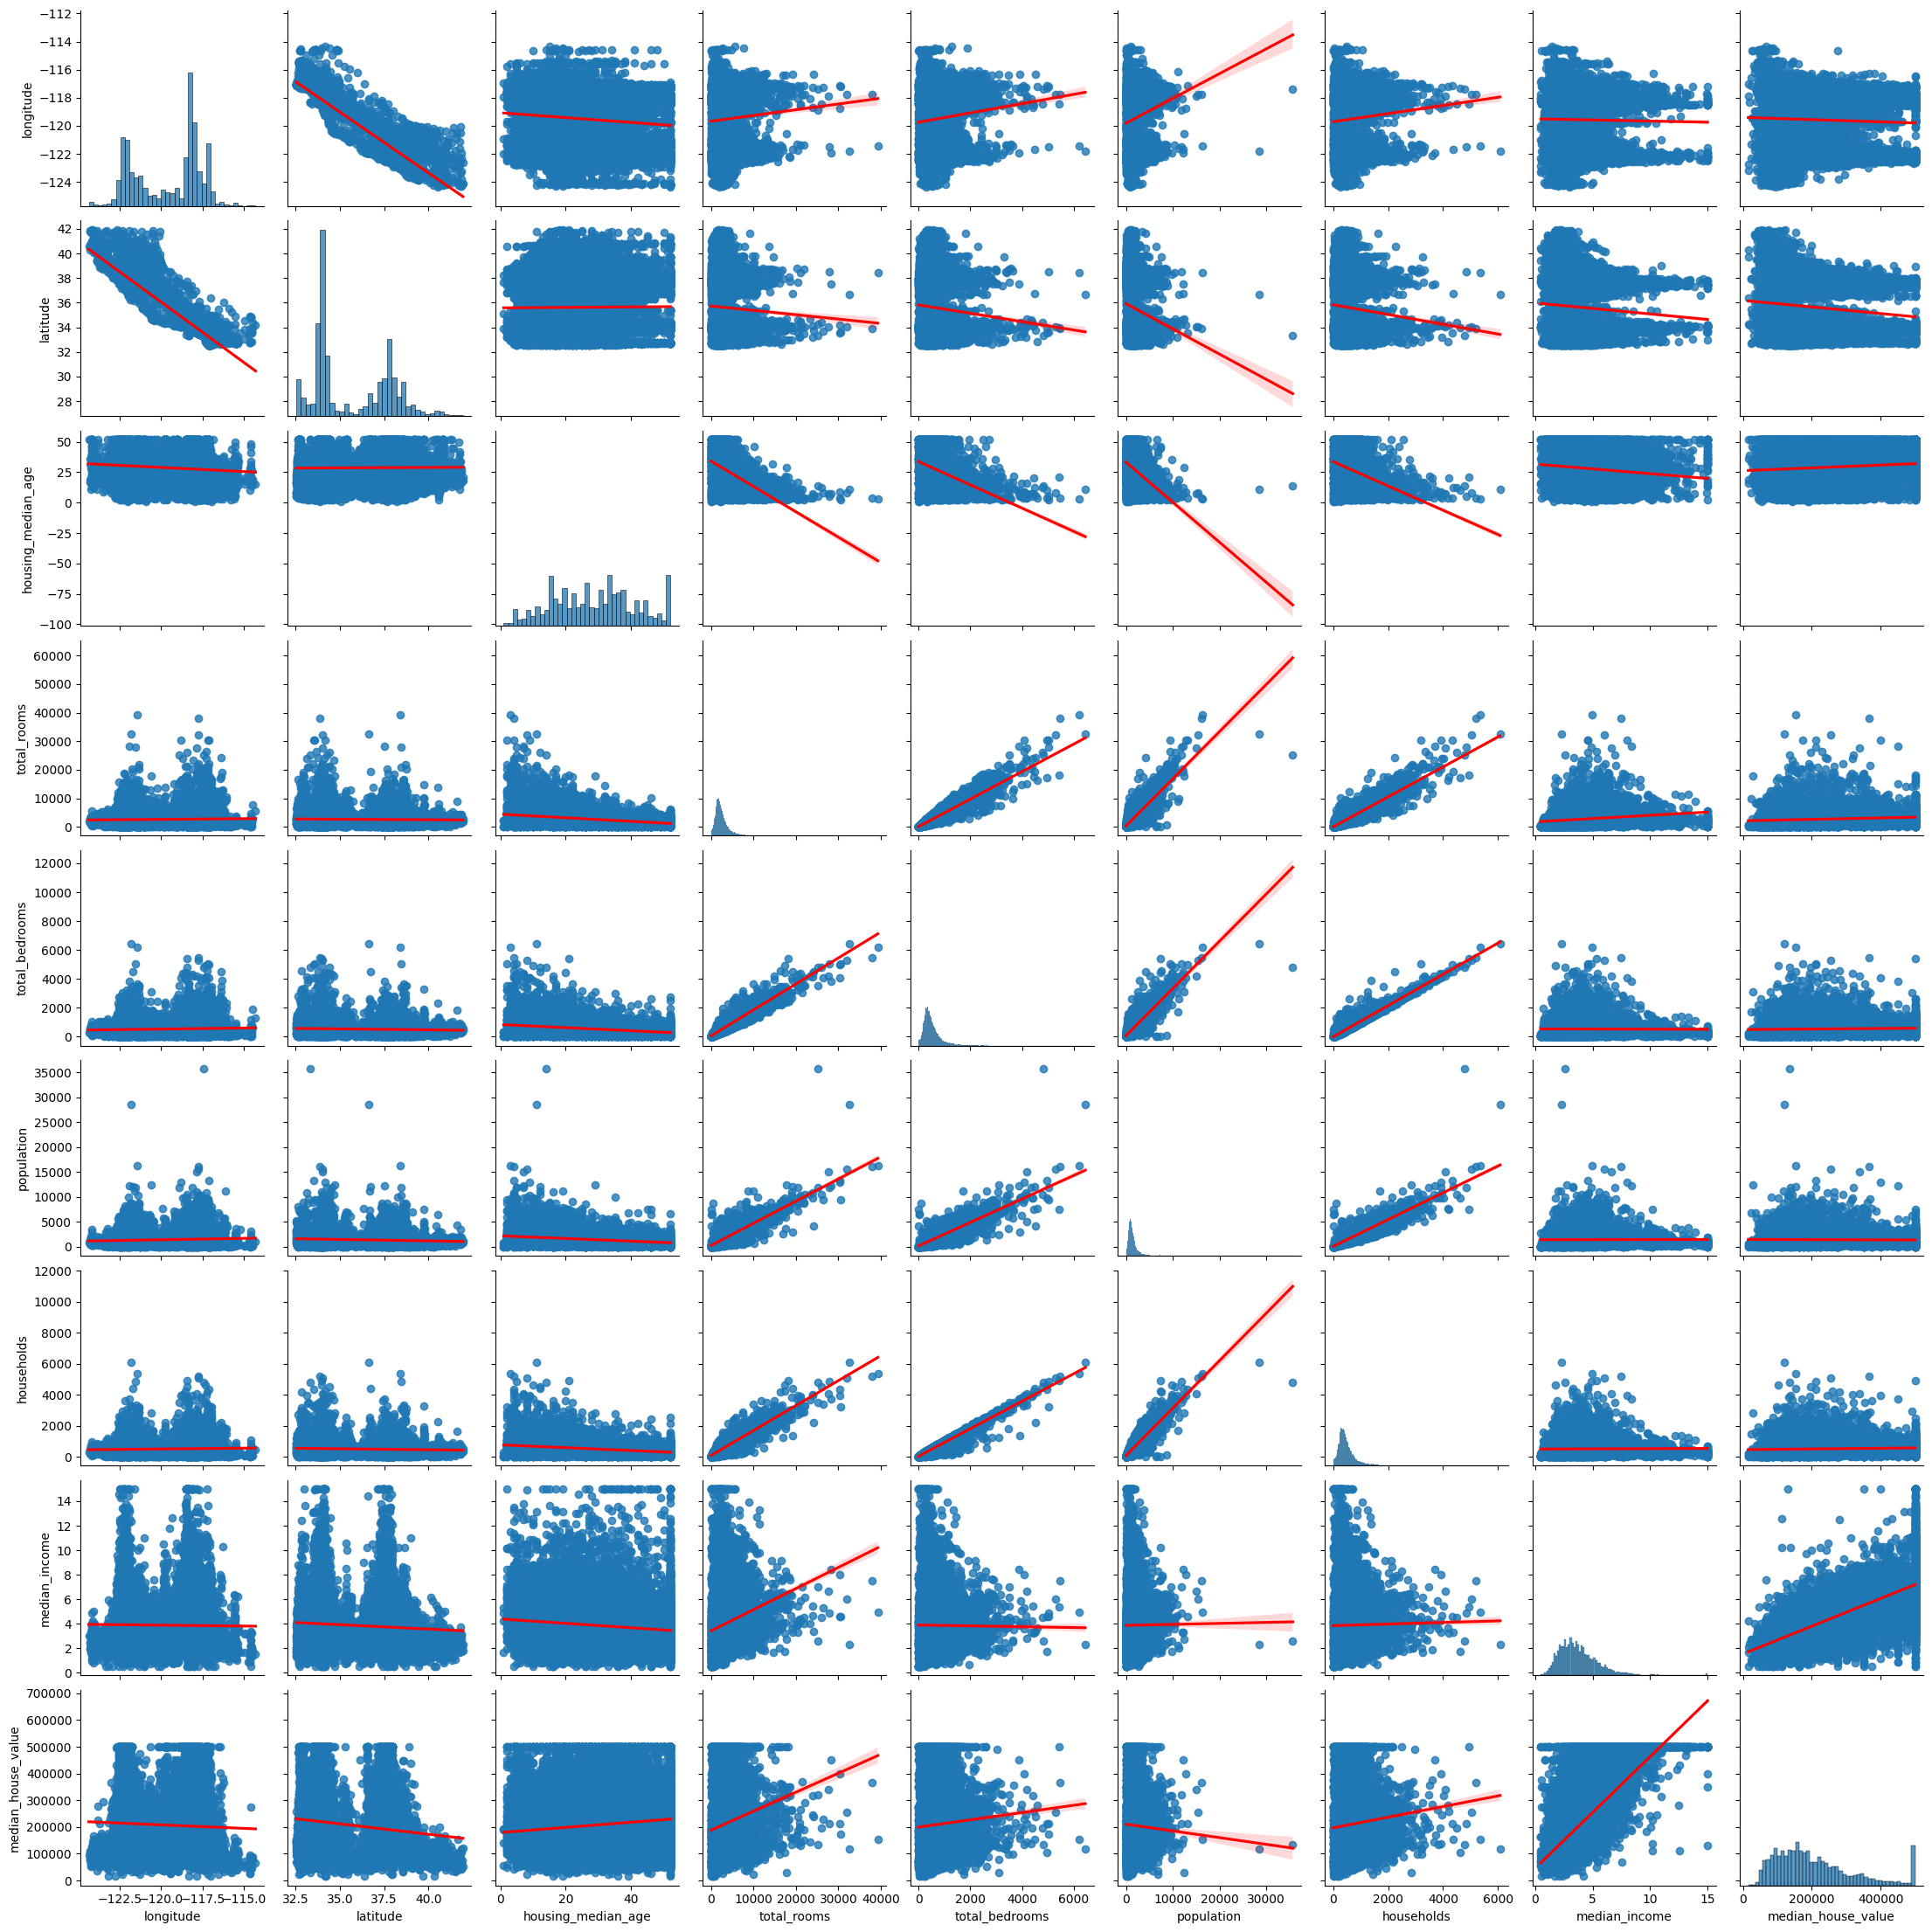

In [13]:
# Your code here . . .
#the question is asking for a pairwise which mean a plot with a connection

sns.pairplot(ca, kind='reg', plot_kws={'line_kws':{'color':'red'}})

plt.title('Pairwise Relationship with Regression Lines')
plt.show()

### Q5. Create a relplot that shows the `median_income` and `median_house` along with the `longitude` and `latitude`.
Plot `longitude` along the x-axis and `latitude` along the y-axis. Use `hue` to display the `median_house_value` and the size of the data point `median_income`. Include a meaningful title to the plot.

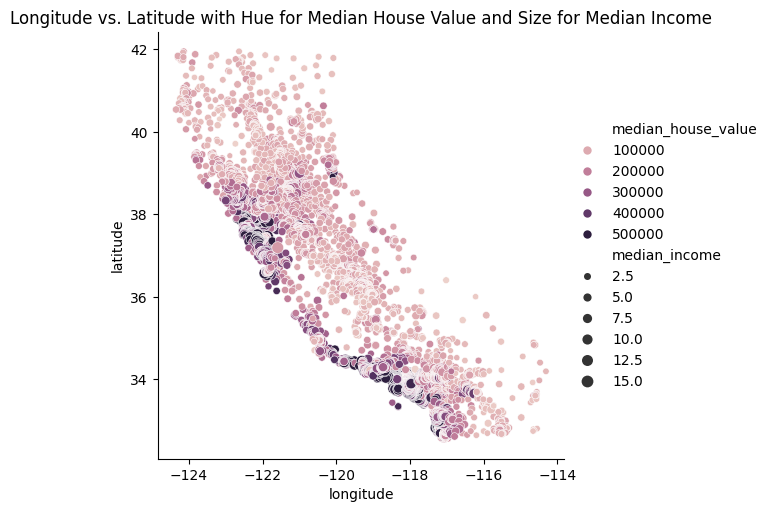

In [14]:
# Your code here . . .
sns.relplot(data=ca, x='longitude', y='latitude', hue='median_house_value', size='median_income')

plt.title('Longitude vs. Latitude with Hue for Median House Value and Size for Median Income')
plt.show()

### Q6: Create a plot with small multiples plots
The small multiple plots should show the relationship between `median_house_value` vs `median_income` using `ocean_proximity` as the single category. Only use data with `median_house_value` < 500000. Organize the multiple plots to have 2 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

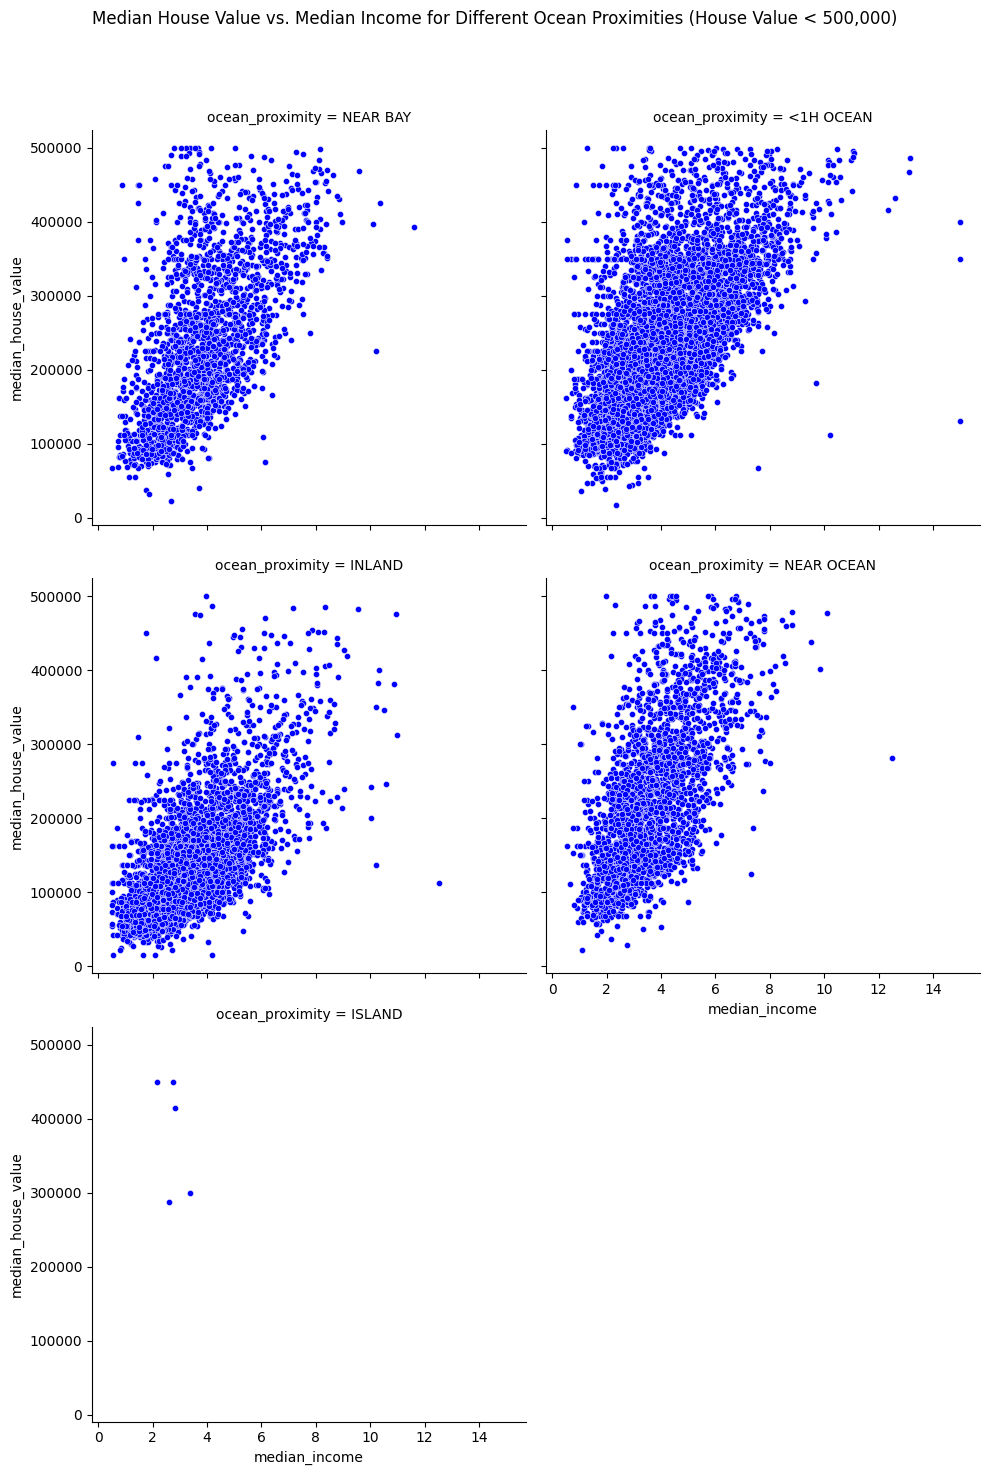

In [20]:
# Your code here . . .
#lets do the filtering data < 500,000
filtering_data = ca[ca['median_house_value'] <= 500000]

# I set col_wrap=2 to have 2 plots per row and set the height of each plot to 5
g=sns.FacetGrid(filtering_data, col='ocean_proximity', col_wrap=2, height=5)

# Now, I map a scatter plot on each facet, plotting median_income vs median_house_value
# I use s=20 to set the size of the data points
g.map(sns.scatterplot, 'median_income', 'median_house_value', s=20, color='blue')

plt.subplots_adjust(top=0.9)  # Adjust the top of the plots to fit the title
g.fig.suptitle('Median House Value vs. Median Income for Different Ocean Proximities (House Value < 500,000)')

plt.show()